In [1]:
import os

from sklearn.metrics import classification_report


def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred))

In [2]:
import numpy as np 
import pandas as pd 
from wordcloud import WordCloud 
from wordcloud import STOPWORDS 
import nltk 


import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split 

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#import methods
from sklearn.naive_bayes import MultinomialNB 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
df = pd.read_csv('trials.csv')
df.head(5)

nctid                                        description label
0  NCT02464748  MND is often referred to as amyotrophic latera...   ALS
1  NCT00362362  OBJECTIVE:||The causes of sporadic motor neuro...   ALS
2  NCT03154450  Non-invasive ventilation (NIV) use in patients...   ALS
3  NCT03487263  The objectives of this study are to determine:...   ALS
4  NCT04454892  With the development of supportive measures, t...   ALS

In [4]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rajkumarkonderu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rajkumarkonderu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
df.columns = ['nctid', 'description','label']
df.head()

nctid                                        description label
0  NCT02464748  MND is often referred to as amyotrophic latera...   ALS
1  NCT00362362  OBJECTIVE:||The causes of sporadic motor neuro...   ALS
2  NCT03154450  Non-invasive ventilation (NIV) use in patients...   ALS
3  NCT03487263  The objectives of this study are to determine:...   ALS
4  NCT04454892  With the development of supportive measures, t...   ALS

In [6]:
df.shape

(1759, 3)

In [7]:
df.isna().sum()

nctid          0
description    0
label          0
dtype: int64

In [8]:
df.label.value_counts()

ALS                              368
Dementia                         368
Obsessive Compulsive Disorder    358
Scoliosis                        335
Parkinson’s Disease              330
Name: label, dtype: int64

In [9]:
df.dropna(axis=0,inplace=True)
df.isna().sum()

nctid          0
description    0
label          0
dtype: int64

In [10]:
df.shape

(1759, 3)

In [11]:
df_labels = df['label']
df_labels.head(5)

0    ALS
1    ALS
2    ALS
3    ALS
4    ALS
Name: label, dtype: object

In [12]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/rajkumarkonderu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True



				 ALS


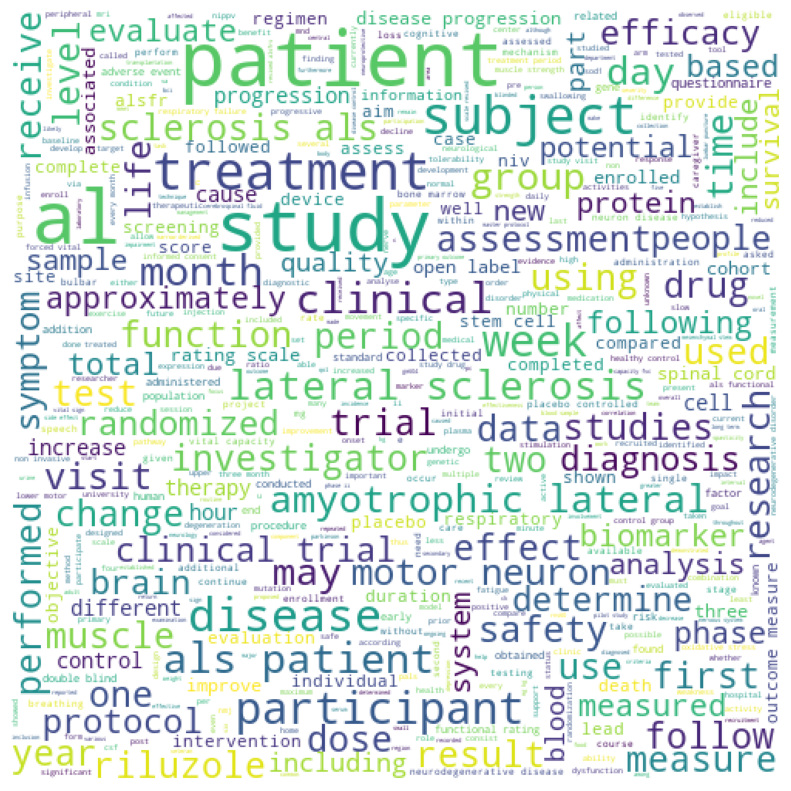

				 Dementia WORDS


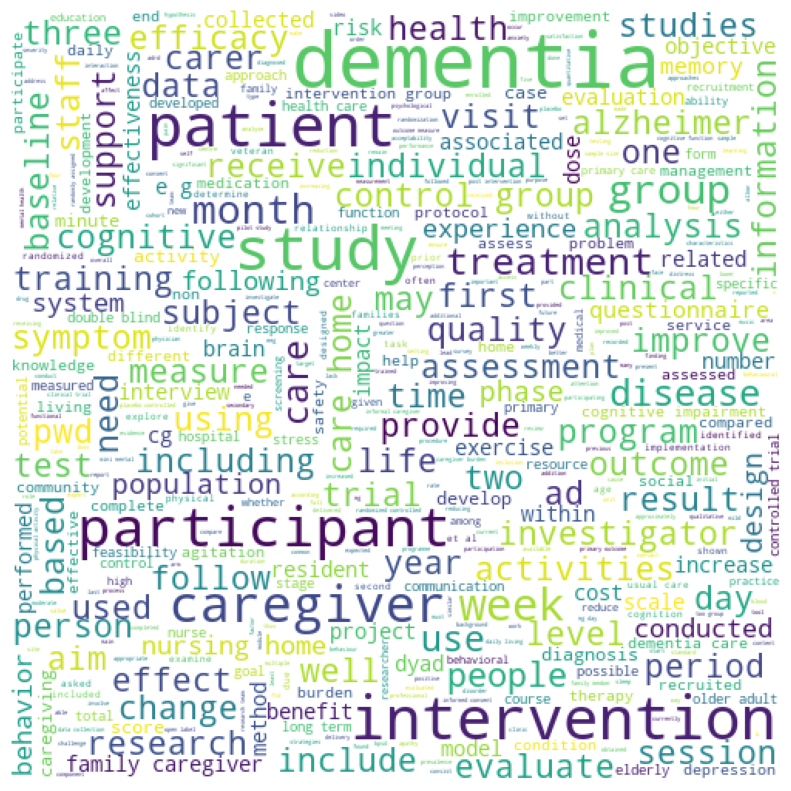

				 Obsessive Compulsive Disorder


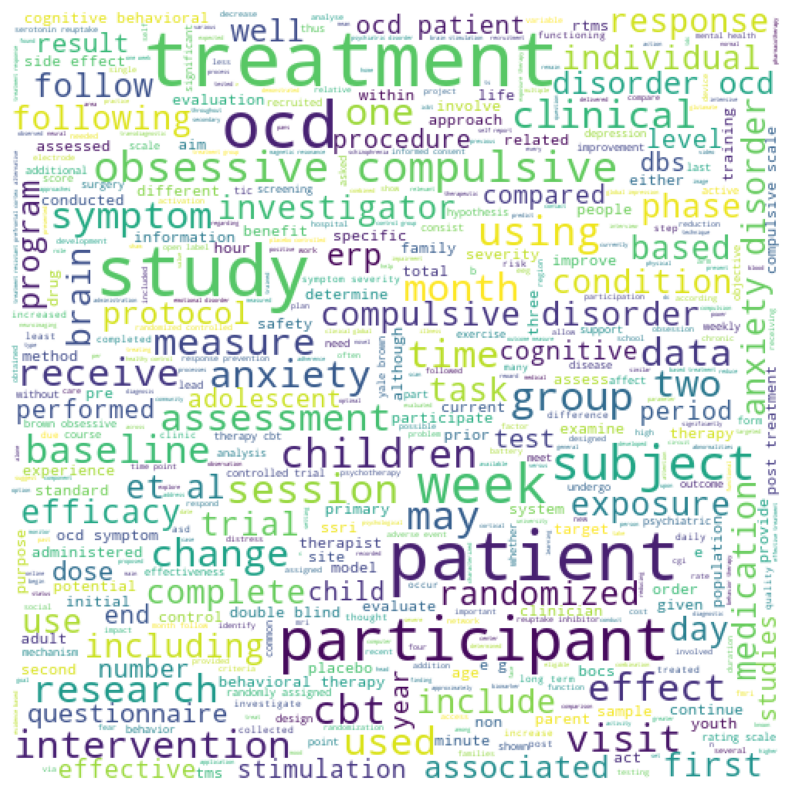

				 Scoliosis WORDS


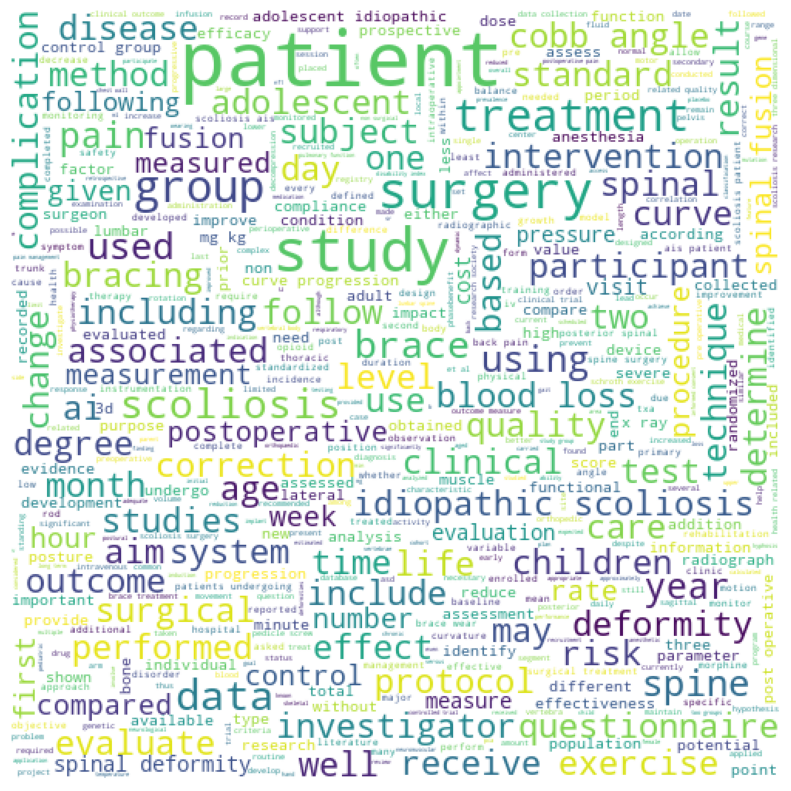

				 Parkinson’s Disease


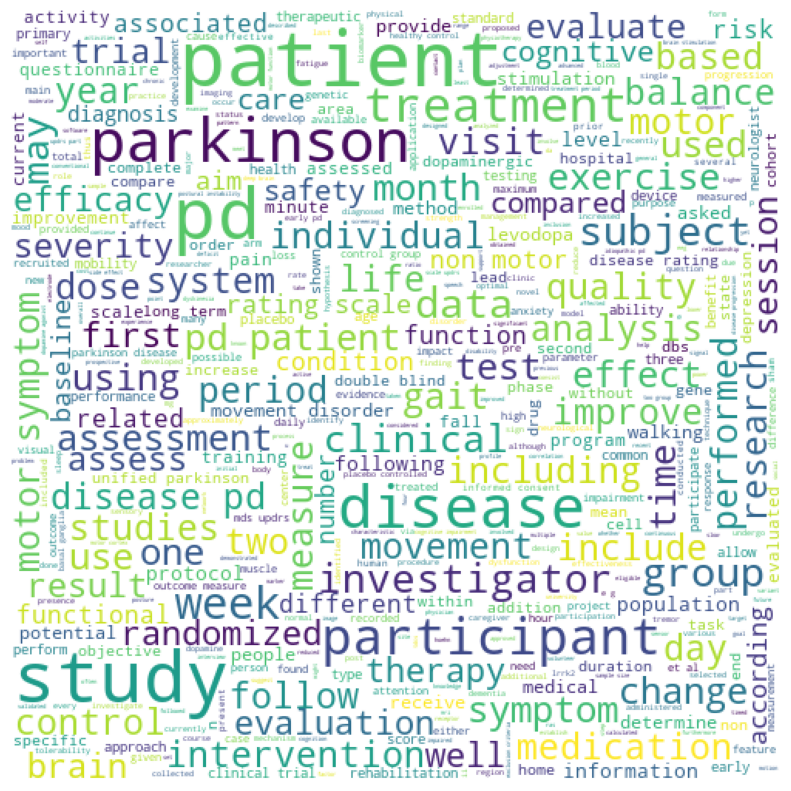

In [13]:

stopwords = STOPWORDS
stopwords = list(stopwords)
STOPWORDS = nltk.corpus.stopwords.words('english')
stopwords = stopwords + STOPWORDS

ALS_dataset = df[df.label == 'ALS']
Dementia_dataset = df[df.label == 'Dementia']
Obsessive_Compulsive_Disorder_dataset = df[df.label == 'Obsessive Compulsive Disorder']
Scoliosis_dataset = df[df.label == 'Scoliosis']
Parkinsons_Disease_dataset = df[df.label == 'Parkinson’s Disease']

ALS_words                          =' '                         
Dementia_words                     =' '    
Obsessive_Compulsive_Disorder_words=' '   
Scoliosis_words                    =' '                       
Parkinsons_Disease_words          =' '             

for words in ALS_dataset.description:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        ALS_words = ALS_words + word + " "
for words in Dementia_dataset.description:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        Dementia_words = Dementia_words + word + " "
for words in Obsessive_Compulsive_Disorder_dataset.description:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        Obsessive_Compulsive_Disorder_words = Obsessive_Compulsive_Disorder_words + word + " "        
for words in Scoliosis_dataset.description:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        Scoliosis_words = Scoliosis_words + word + " "        
for words in Parkinsons_Disease_dataset.description:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        Parkinsons_Disease_words = Parkinsons_Disease_words + word + " " 
def gen_wordcloud(wordcloud):
    plt.figure(figsize = (10,8))
    plt.imshow(wordcloud)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    
print("\n")    
print("\t\t\t\t ALS")    
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(ALS_words)
gen_wordcloud(wordcloud)

print("\t\t\t\t Dementia WORDS")
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(Dementia_words)
gen_wordcloud(wordcloud)

print("\t\t\t\t Obsessive Compulsive Disorder")
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(Obsessive_Compulsive_Disorder_words)
gen_wordcloud(wordcloud)

print("\t\t\t\t Scoliosis WORDS")
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(Scoliosis_words)
gen_wordcloud(wordcloud)

print("\t\t\t\t Parkinson’s Disease")
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(Parkinsons_Disease_words)
gen_wordcloud(wordcloud)

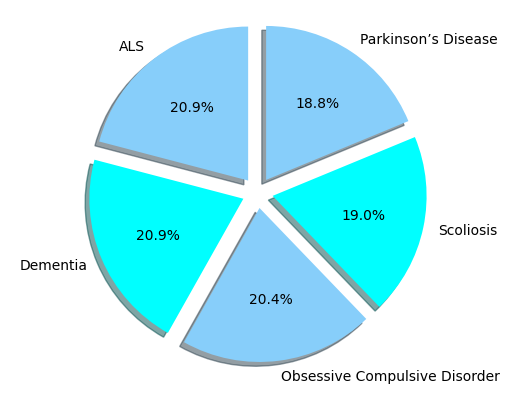

In [14]:
count_Class = pd.value_counts(df.label, sort = True)

# Data to Plot
labels = 'ALS', 'Dementia','Obsessive Compulsive Disorder','Scoliosis','Parkinson’s Disease'
sizes = [count_Class[0], count_Class[1],count_Class[2],count_Class[3],count_Class[4]]
colors = ['lightskyblue', 'Aqua']
explode = (0.1, 0.1,0.1,0.1,0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [15]:
X = df['description']
y = df['label']





In [16]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import joblib

# Building pipeline with TF-IDF and Decision Tree
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('clf', DecisionTreeClassifier(random_state=42))
])

In [27]:
# Train model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('clf', DecisionTreeClassifier(random_state=42))])

In [28]:
# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                               precision    recall  f1-score   support

                          ALS       0.90      0.90      0.90        73
                     Dementia       0.87      0.91      0.89        67
Obsessive Compulsive Disorder       0.82      0.89      0.85        79
          Parkinson’s Disease       0.89      0.88      0.89        66
                    Scoliosis       0.97      0.85      0.90        67

                     accuracy                           0.89       352
                    macro avg       0.89      0.89      0.89       352
                 weighted avg       0.89      0.89      0.89       352



In [32]:
# Saving the model
joblib.dump(model, "decision_tree_text_Classification_model.joblib")
joblib.dump(model, "TfidfVectorizer.joblib")

['TfidfVectorizer.joblib']

In [34]:
import pickle
with open("decision_tree_text_model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("TfidfVectorizer.pkl", "wb") as f:
    pickle.dump(model, f)    

In [35]:
def predict_condition(text):
    with open("decision_tree_text_model.pkl", "rb") as f:
        loaded_model = pickle.load(f)
    prediction = loaded_model.predict([text])
    return prediction[0]

# Example usage
if __name__ == "__main__":
    sample_text = "This study evaluates patients with motor neuron disease symptoms."
    print("Predicted label:", predict_condition(sample_text))

Predicted label: Obsessive Compulsive Disorder
